# Homework 2

#### Sitong Ju
#### USC ID: 8791155953
#### email: sitongju@usc.edu

In [1]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

pd.options.mode.chained_assignment = None  # default='warn'

(b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

There are 9568 rows and 5 columns in this data set. Each row represents a data point collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. AT = average ambient variables Temperature, V = Exhaust Vacuum, AP = Ambient Pressure, RH = Relative Humidity, PE = net hourly electrical energy output

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

findings: 

dependent variable PE with other independent pariables:
1. PE and AT has a negative relationship
2. PE and V has a negative relationship

Besides, V and AT have a positive relationship. The larger the V, the larger the larger the AT

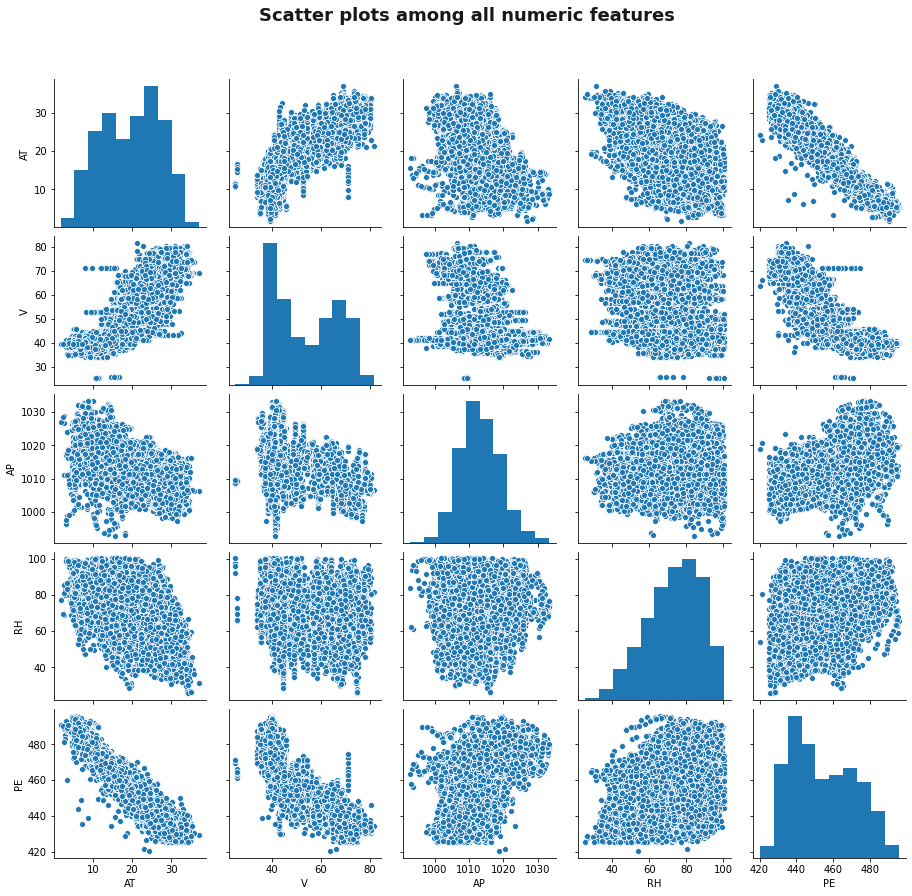

In [3]:
pairplot_fig = sns.pairplot(df, vars=['AT', 'V', 'AP', 'RH', 'PE'])
plt.subplots_adjust(top=0.9)
pairplot_fig.fig.suptitle("Scatter plots among all numeric features", fontsize=18, alpha=0.9, weight='bold')
plt.show()

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
vals = ['AT', 'V', 'AP', 'RH', 'PE']
mean = []
median = []
rg = []
firstq = []
thirdq = []
interq = []

for i in vals:
    mean.append(df[i].mean(axis=0))
    median.append(df[i].quantile(q=0.5))
    rg.append(df[i].max(axis=0) - df[i].min(axis=0))
    firstq.append(df[i].quantile(q=0.25))
    thirdq.append(df[i].quantile(q=0.75))
    interq.append(df[i].quantile(q=0.75) - df[i].quantile(q=0.25))

iii_result = pd.DataFrame({
    'mean': mean,
    'median': median,
    'range': rg,
    'first quartile': firstq,
    'third quartile': thirdq,
    'interquartile range': interq
}, index = vals)
iii_result

,mean,median,range,first quartile,third quartile,interquartile range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


(c) For each predictor, fit a simple linear regression to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

All the models indicate a statistically significant association between the predictor and the response. The p-value for the independent variables are all close to 0 in these models. The AT model and the V model has a better goodness of fit, since the R-squared is relatively higher in these two models.

About outilers: I used cook's distance to detect the outliers. Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted. The larger the value for Cook’s distance, the more influential a given observation. 4/n is a genrally used threshold. There are 416 outliers in the AT model, 423 outliers in the V model, 300 outliers in the AP model and 249 outliers in the RH model.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:02   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

[Text(0.5, 1.0, 'Sinple linear regression with AT and PE')]

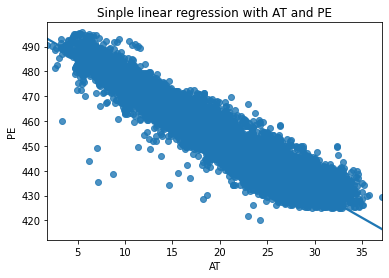

In [5]:
model_AT = ols('PE~AT', df).fit()
print(model_AT.summary())
sns.regplot(x='AT', y='PE', data=df).set(title = 'Sinple linear regression with AT and PE')

In [6]:
np.set_printoptions(suppress=True)#suppress scientific notation
influence = model_AT.get_influence()#create instance of influence
cooks = influence.cooks_distance#obtain Cook's distance for each observation
#plt.scatter(df.AT, cooks[0])
#plt.xlabel('AT')
#plt.ylabel('Cooks Distance')
#plt.title('Cooks Distance of AT in the Simple Linear Regression')
#plt.show()
threshold = 4/9568
cooks_AT = pd.DataFrame({
    'AT': df.AT,
    'cooks': cooks[0]
})
outliers_AT = cooks_AT[cooks_AT.cooks > threshold]
outliers_AT

,AT,cooks
21,5.41,0.000819
61,29.01,0.000679
87,32.72,0.001043
89,35.56,0.000962
121,27.54,0.000635
...,...,...
9452,33.20,0.001328
9475,30.26,0.000730
9477,34.03,0.002467
9542,5.01,0.001010


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:03   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

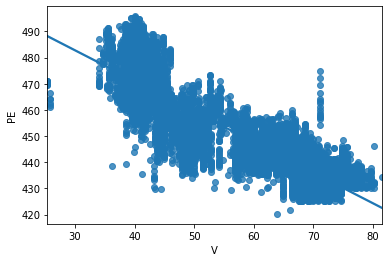

In [7]:
model_V = ols('PE~V', df).fit()
print(model_V.summary())
sns.regplot(x='V', y='PE', data=df)

In [8]:
np.set_printoptions(suppress=True)#suppress scientific notation
influence = model_V.get_influence()#create instance of influence
cooks = influence.cooks_distance#obtain Cook's distance for each observation
cooks_V = pd.DataFrame({
    'V': df.V,
    'cooks': cooks[0]
})
outliers_V = cooks_V[cooks_V.cooks > threshold]
outliers_V

,V,cooks
2,39.40,0.000493
21,40.07,0.000977
24,48.60,0.000552
47,43.43,0.000461
57,39.33,0.000679
...,...,...
9359,75.23,0.000525
9394,39.72,0.000428
9404,44.89,0.000453
9471,43.77,0.000529


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:04   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

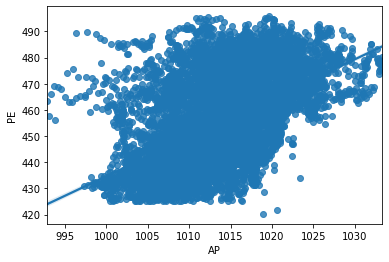

In [9]:
model_AP = ols('PE~AP', df).fit()
print(model_AP.summary())
sns.regplot(x='AP', y='PE', data=df)

In [10]:
np.set_printoptions(suppress=True)#suppress scientific notation
influence = model_AP.get_influence()#create instance of influence
cooks = influence.cooks_distance#obtain Cook's distance for each observation
cooks_AP = pd.DataFrame({
    'AP': df.AP,
    'cooks': cooks[0]
})
outliers_AP = cooks_AP[cooks_AP.cooks > threshold]
outliers_AP

,AP,cooks
21,1019.16,0.000502
22,1008.52,0.000535
57,1010.18,0.000542
74,1008.82,0.000425
114,1001.24,0.000656
...,...,...
9366,1030.61,0.000546
9459,1008.43,0.000576
9483,1005.24,0.000939
9521,998.27,0.002916


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:05   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

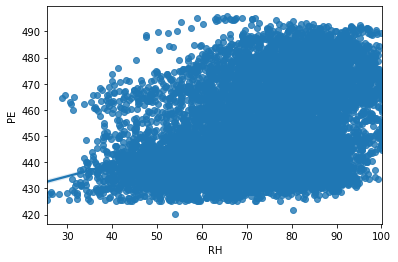

In [11]:
model_RH = ols('PE~RH', df).fit()
print(model_RH.summary())
sns.regplot(x='RH', y='PE', data=df)

In [12]:
np.set_printoptions(suppress=True)#suppress scientific notation
influence = model_RH.get_influence()#create instance of influence
cooks = influence.cooks_distance#obtain Cook's distance for each observation
cooks_RH = pd.DataFrame({
    'RH': df.RH,
    'cooks': cooks[0]
})
outliers_RH = cooks_RH[cooks_RH.cooks > threshold]
outliers_RH

,RH,cooks
8,41.25,0.001618
15,43.08,0.000522
16,48.84,0.000477
21,64.77,0.000569
48,50.00,0.000715
...,...,...
9124,97.21,0.000504
9204,98.84,0.000516
9361,90.20,0.000491
9469,93.39,0.000529


(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

All the predictors in the multiple regression model are significant with the p-value's are all close to zero. The model also has a high goodness of fit with R-squared = 0.929. For all the predictors AT, V, AP, RH, we can reject the null hypothesis H0: βj = 0.

In [13]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
X = sm.add_constant(X)
model_whole = sm.OLS(y, X).fit()
model_whole.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:05   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

The results from 1c is different from the results from id. According to the plot, we can see that there is a positive relationship between the two results.

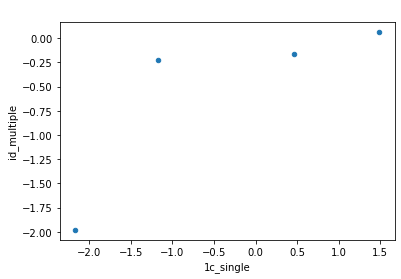

In [14]:
df_e = pd.DataFrame({
    '1c_single':[-2.17, -1.17, 1.49, 0.46],
    'id_multiple':[-1.98, -0.23, 0.06, -0.16]
},index = ['AT', 'V', 'AP', 'RH'])
df_e.plot.scatter(x = '1c_single', y = 'id_multiple', title=" ")

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε

There are nonlinear associations between the predictors and the response. For the AT model, AT, AT^2, and AT^3 are all significant. For the V model, only V and V^3 are significant. For the AP model, AP, AP^2 and AP^3 are all significant. For the RH model, RH, RH^2 and RH^3 are all significant.

In [15]:
df['AT^2'] = df['AT']**2
df['AT^3'] = df['AT']**3

X = df[['AT', 'AT^2', 'AT^3']]
y = df['PE']
X = sm.add_constant(X)
model_AT2 = sm.OLS(y, X).fit()
model_AT2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:06   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
AT            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
AT^2          -0.1251      0.007    -18.199      0.000      -0.139      -0.112
AT^3           0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df['V^2'] = df['V']**2
df['V^3'] = df['V']**3

X = df[['V', 'V^2', 'V^3']]
y = df['PE']
X = sm.add_constant(X)
model_V2 = sm.OLS(y, X).fit()
model_V2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:06   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
V^2           -0.0027      0.009     -0.294      0.768      -0.021       0.015
V^3            0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df['AP^2'] = df['AP']**2
df['AP^3'] = df['AP']**3

X = df[['AP', 'AP^2', 'AP^3']]
y = df['PE']
X = sm.add_constant(X)
model_AP2 = sm.OLS(y, X).fit()
model_AP2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:06   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
AP^2          -0.0500      0.006     -8.439      0.000      -0.062      -0.038
AP^3        2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
df['RH^2'] = df['RH']**2
df['RH^3'] = df['RH']**3

X = df[['RH', 'RH^2', 'RH^3']]
y = df['PE']
X = sm.add_constant(X)
model_RH2 = sm.OLS(y, X).fit()
model_RH2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:06   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
RH^2           0.0321      0.007      4.433      0.000       0.018       0.046
RH^3          -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

All the pairwise interaction terms are statistically significant except for AT AP and V RH

In [19]:
df['AT*V'] = df['AT']*df['V']
df['AT*AP'] = df['AT']*df['AP']
df['AT*RH'] = df['AT']*df['RH']
df['V*AP'] = df['V']*df['AP']
df['V*RH'] = df['V']*df['RH']
df['AP*RH'] = df['AP']*df['RH']

X = df[['AT','V','AP','RH','AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH']]
y = df['PE']
X = sm.add_constant(X)
model_interaction = sm.OLS(y, X).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:06   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT*V           0.0210      0.001     23.338      0.000       0.019       0.023
AT*AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT*RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V*AP           0.0068      0.001      5.135      0.000       0.004       0.009
V*RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP*RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

MSE for model 1: train 20.94, test 20.37

MSE for model 2: train 37.75, test 38.44

For model 2, using threshold 0.05, Insignificant variables are AT, V, AT AP, V AP, V RH, V^2
Also should be removed: AT V, AT RH because we already removed AT and V, their interaction terms should also be removed

In [20]:
X_h1 = df[['AT', 'V', 'AP', 'RH']]
y = df[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X_h1, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regressor.coef_[0][idx]))

print('Train Mean squared error: %.2f'
      % mean_squared_error(y_train, y_train_pred))

print('Test Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred))

Train Mean squared error: 20.94
Test Mean squared error: 20.37


In [21]:
X_h2 = df[['AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH', 'AT^2', 'V^2', 'AP^2', 'RH^2']]
y = df[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X_h2, y, test_size=0.3, random_state=0)
X_train = sm.add_constant(X_train)
model_h2 = sm.OLS(y_train, X_train).fit()
model_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:47:06   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
AT            -6.3067      3.826     -1.648      0.099     -13.807       1.194
V             -2.7832      1.818     -1.531      0.126      -6.347       0.780
AP            14.8033      2.916      5.076      0.000       9.086      20.521
RH             3.3825      1.086      3.114      0.002       1.253       5.512
AT*V           0.0103      0.003      3.174      0.002       0.004       0.017
AT*AP          0.0037      0.004      0.997      0.319      -0.004       0.011
AT*RH         -0.0061      0.002     -3.305      0.001      -0.010      -0.002
V*AP           0.0023      0.002      1.290      0.197      -0.001       0.006
V*RH           0.0003      0.001      0.340      0.734      -0.001       0.002
AP*RH         -0.0031      0.001     -2.934      0.003      -0.005      -0.001
AT^2           0.0168      0.004      4.482      0.000       0.009       0.024
V^2           -0.0005      0.001     -0.551      0.581      -0.002       0.001
AP^2          -0.0072      0.001     -5.108      0.000      -0.010      -0.004
RH^2          -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_h2 = df[['AP', 'RH', 'AP*RH', 'AT^2', 'AP^2', 'RH^2']]
y = df[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X_h2, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regressor.coef_[0][idx]))

print('Train Mean squared error: %.2f'
      % mean_squared_error(y_train, y_train_pred))
print('Test Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred))

Train Mean squared error: 37.75
Test Mean squared error: 38.44


(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

For raw features, the k that gives the best fit is 4.
For normalized features, the k that gives the best fit is 5.

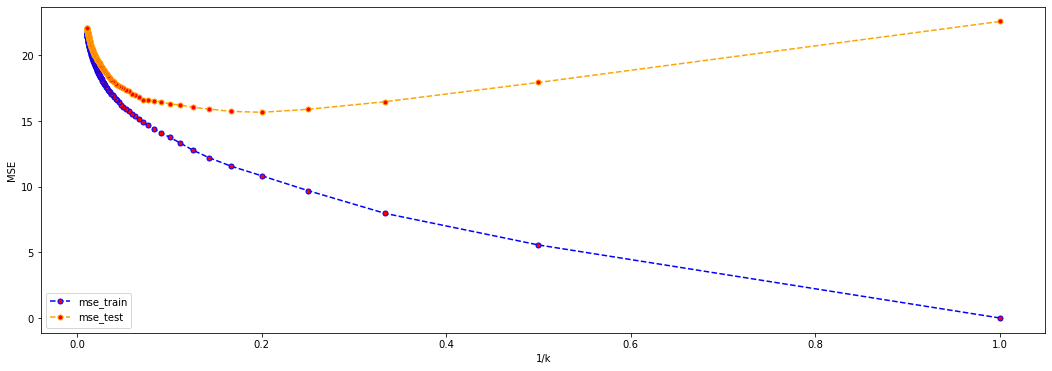

In [23]:
# KNN for raw features
mse_train=[]
mse_test=[]

X_h1 = df[['AT', 'V', 'AP', 'RH']]
y = df[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X_h1, y, test_size=0.3, random_state=0)
x_train = X_train.values.tolist()
y_train = y_train.values.flatten().tolist() 
x_test = X_test.values.tolist()
y_test = y_test.values.flatten().tolist()

for k in range(1,100,1):
    neigh = KNeighborsRegressor(n_neighbors=k,p=2,metric = 'euclidean')
    neigh.fit(x_train, y_train)
    
    y_pred_train = neigh.predict(x_train)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test = neigh.predict(x_test)
    mse_test.append(mean_squared_error(y_test, y_pred_test))

k_list = []
for i in range (1, 100, 1):
    k_list.append(1/i)
    
plt.figure(figsize=(18,6))
plt.plot(k_list,mse_train,label="mse_train",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.plot(k_list,mse_test,label="mse_test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [24]:
def search_min_k(thelist, min_mse):
    for i in range(len(thelist)):
        if thelist[i]== min_mse:
            return i
search_min_k(mse_test, min(mse_test))

4

In [25]:
min(mse_test)

15.6635051689307

In [26]:
# KNN for normalized features
# Min-Max Normalization
df_array = df.iloc[:,0:4].values
min_max_scaler = preprocessing.MinMaxScaler() 
df_re = min_max_scaler.fit_transform(df_array)
df_norm = pd.DataFrame(df_re,columns=['AT','V','AP','RH'])
df_norm = pd.concat([df_norm,df['PE']],axis=1)
df_norm

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,463.26
1,0.662040,0.669039,0.671863,0.449330,444.37
2,0.093484,0.249822,0.476862,0.892493,488.56
3,0.539660,0.568683,0.429349,0.684718,446.48
4,0.255241,0.216014,0.404355,0.952547,473.90
...,...,...,...,...,...
9563,0.420397,0.432918,0.522643,0.877212,460.03
9564,0.322380,0.245907,0.761693,0.552547,469.62
9565,0.835977,0.871352,0.495669,0.146381,429.57
9566,0.642210,0.784520,0.518931,0.493700,435.74


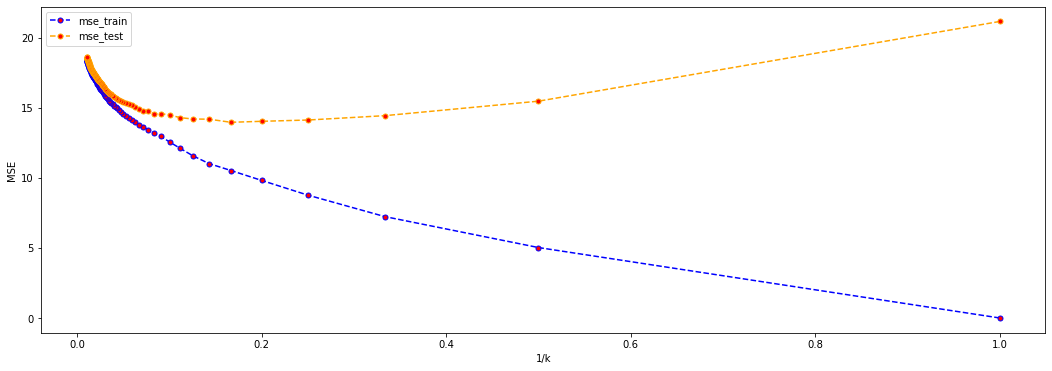

In [27]:
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(df_norm.iloc[:,0:4],df_norm['PE'], test_size=0.3, random_state=0)

mse_train_norm=[]
mse_test_norm=[]

X_h1 = df[['AT', 'V', 'AP', 'RH']]
y = df[['PE']]
x_train = X_norm_train.values.tolist()
y_train = y_norm_train.values.flatten().tolist() 
x_test = X_norm_test.values.tolist()
y_test = y_norm_test.values.flatten().tolist()

for k in range(1,100,1):
    neigh = KNeighborsRegressor(n_neighbors=k,p=2,metric = 'euclidean')
    neigh.fit(x_train, y_train)
    
    y_pred_train = neigh.predict(x_train)
    mse_train_norm.append(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test = neigh.predict(x_test)
    mse_test_norm.append(mean_squared_error(y_test, y_pred_test))

k_list = []
for i in range (1, 100, 1):
    k_list.append(1/i)
    
plt.figure(figsize=(18,6))
plt.plot(k_list,mse_train_norm,label="mse_train",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.plot(k_list,mse_test_norm,label="mse_test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [28]:
search_min_k(mse_test_norm, min(mse_test_norm))

5

In [29]:
min(mse_test_norm)

13.969460847943033

(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

Comparing the MSE's, the KNN regression model with normalized features performs better. The baseline linear regression model has smallest test MSE of 20.37, and the test MSE of KNN regression model with normalized features is around 14. The dataset we used only has 4 predictors. It will not cause curse of dimensionality by using KNN regression. If it has more predictors, linear regression model may be a better choice.

ISLR 2.4.1

(a) Better. A large sample size will fit the data better.
<br /> (b) Worse. A flexible method would overfit the small number of observations.
<br /> (c) Better. A higher degrees of freedom will lead to a method that fit better than a inflexible one.
<br /> (d) Worse. A flexible method would fit to the noise in the error terms and increase variance.

ISLR 2.4.7

(a) observation1: sqrt(3^2) = 3
<br /> observation2: sqrt(2^2) = 2
<br /> observation3: sqrt(1^2+3^2) = 3.16
<br /> observation4: sqrt(1^2+2^2) = 2.23
<br /> observation5: sqrt(1^2+1^2) = 1.41
<br /> observation6: sqrt(1^2+1^2+1^2) = 1.73

(b)K =1 We only use obs5 to predict. Therefore, prediction is green.

(c)K=3 Use obs5, obs6, obs2 to predict. Therefore, prediction is red.

(d)We expect the best value for k to be small because as k becomes larger, the boundary becomes inflexible (linear). 

References:
Cook's distance: https://www.statology.org/cooks-distance-python/